# SnakID
## Identification of Kay's Brown Snake and Rattle Snake using Convolutional Neural Networks 

This is part of my final project for the data analytics bootcamp with Ironhack.

This is the Notebook where I set up a Convolutional Neural Network, using snake image data obtained from the following source (data curator- SAMEEHA RAHMAN):

https://www.kaggle.com/datasets/sameeharahman/preprocessed-snake-images

For aiding me in building of this CNN, I also referred to scripts written by Francois Chollet. And some code from Hitesh Kumar on Kaggle for being able to output the results of the model.

Much thanks to my course lecturer Ignacio Soteras for his guidance.

In [1]:
#First Import the libraries  needed to build the model 

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

In [186]:
#In this dictionary I define the snake species and their values, as the folders were in this order 
snake_dict = {0: "DeKay's", 1: "Rattle Snake"}

In [2]:
#Then I set the size I want my images to be
#'This one gives me really good quality'
img_width, img_height = 150, 150

train_data_dir = '/_snakes_american_data/train'# directory to the train set
validation_data_dir = '/_snakes_american_data/test'#directory to the test set
nb_train_samples = 6408 #Total number of train samples for both classes of snakes
nb_validation_samples = 710 #OTotal number of valiation samples for both classes of snakes
epochs = 50 #Total number of epochs to run the CNN
batch_size = 16 # batch size per run 

In [3]:
#This step determines what the input data shape should be 

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [4]:
K.image_data_format()

'channels_last'

In [6]:
# Neural Network 1
#In this Sequential Neural Network I add 3 Convolutional layers
# followed by a flatten to make the data 1D, 
# after which I have one hidden layer with a dropout of 0.5 
#and finally the output layer with one neruon(sufficient as this is a binary classification)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))#First convolutional layer
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))#second convolutional layer
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))# third convolutional layer
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))  # Usage in a Keras layer:
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

**Result for model_first_try**: You will see below from the plots that this model was run for 20 epochs and I obtained a validation accuracy of about 0.83 and the loss seemed to gradually decrease 

In [13]:
#import tf.keras.initializers
import tensorflow as tf
from keras import initializers

In [5]:
#nn2


#initializer = tf.keras.initializers.GlorotNormal()

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))#Keep an eye on this
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))  # Usage of initializer ,kernel_initializer=initializer
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


**Result for model_second_try**: You will see below from the plots that this model was run for 50 epochs and I obtained a validation accuracy of about 0.90 and the loss seemed to gradually decrease 

In [ ]:
# Usage in a Keras layer:
#initializer = tf.keras.initializers.GlorotNormal()
#layer = tf.keras.layers.Dense(3, kernel_initializer=initializer)

In [22]:
batch_size = 16

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        '_snakes_american_data/train',  # this is the target directory
        target_size=(150, 150),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        '_snakes_american_data/test',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 6408 images belonging to 2 classes.
Found 710 images belonging to 2 classes.


In [7]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=6408 // batch_size,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=710 // batch_size)
model.save_weights('second_try.h5')  # always save your weights after training or during training

C:\Users\ALP\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50
400/400 [==============================] - 153s 380ms/step - loss: 0.6483 - accuracy: 0.6169 - val_loss: 0.6035 - val_accuracy: 0.6349
Epoch 2/50
400/400 [==============================] - 150s 375ms/step - loss: 0.5882 - accuracy: 0.7154 - val_loss: 0.5626 - val_accuracy: 0.7060
Epoch 3/50
400/400 [==============================] - 151s 377ms/step - loss: 0.5656 - accuracy: 0.7477 - val_loss: 0.5169 - val_accuracy: 0.7486
Epoch 4/50
400/400 [==============================] - 152s 379ms/step - loss: 0.5210 - accuracy: 0.7724 - val_loss: 0.5865 - val_accuracy: 0.7145
Epoch 5/50
400/400 [==============================] - 150s 376ms/step - loss: 0.4864 - accuracy: 0.7901 - val_loss: 0.4774 - val_accuracy: 0.7699
Epoch 6/50
400/400 [==============================] - 151s 378ms/step - loss: 0.4666 - accuracy: 0.8010 - val_loss: 0.4873 - val_accuracy: 0.7656
Epoch 7/50
400/400 [==============================] - 151s 377ms/step - loss: 0.4453 - accuracy: 0.8143 - val_loss: 0.4959 -

In [9]:
import numpy as np
import cv2
import os
import random
import matplotlib.pyplot as plt
import pickle

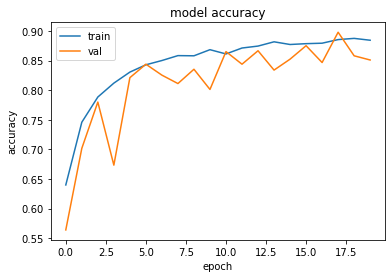

In [10]:
#First model nn1
#plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
#plt.title('model accuracy')
#plt.ylabel('accuracy')
#plt.xlabel('epoch')
#plt.legend(['train', 'val'], loc='upper left')
#plt.show()

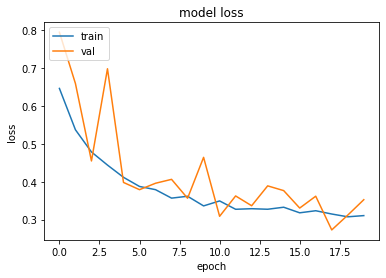

In [11]:
#Second model 
#nn2
#plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
#plt.title('model loss')
#plt.ylabel('loss')
#plt.xlabel('epoch')
#plt.legend(['train', 'val'], loc='upper left')
#plt.show()

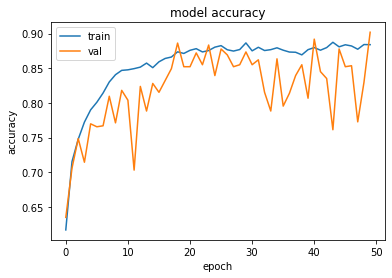

In [10]:
#Second model nn2 accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

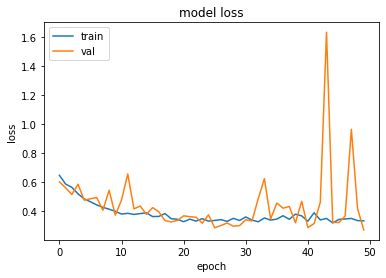

In [11]:
#Second model 
#nn2 loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

The **model_second_try** is by far the best as it obtains a validation accuracy of around 0.90 and see a graual reduction in validation loss (however towards the end there is fluctuation).

In [12]:
from keras.models import model_from_json
import numpy
import os

In [12]:
##Saving the firs model

# serialize model to JSON
#model_json = model.to_json()
#with open("model_first_try.json", "w") as json_file:
 #   json_file.write(model_json)
# serialize weights to HDF5
#print("Saved model to disk")

Saved model to disk


In [13]:
##Saving the second model

# serialize model to JSON
model_json = model.to_json()
with open("model_second_try.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
print("Saved model to disk")

Saved model to disk


In [14]:
# load json and create model

json_file = open('model_first_try.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("first_try.h5")
print("Loaded model from disk")
 
#NOT USED:
#evaluate loaded model on test data
#loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
#score = loaded_model.evaluate(X, Y, verbose=0)
#print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk


In [90]:
#The final validation, are completely new pictures that the train Model has never seen before.
#Here we will put the trained CNN to the test and identify the snake species from the images

final_validation_path = '_snakes_american_data/final_validation'

In [91]:
#Here we process the images for the model
final_validation = test_datagen.flow_from_directory(final_validation_path,target_size=(150, 150),class_mode="binary", batch_size=21)

Found 70 images belonging to 2 classes.


In [114]:

#We split the process images into X, and y, where X is the image data in array, and y is the class 0 or 1 
x,y = final_validation.next()

#We do the predictions on the x
preds = model.predict(x)

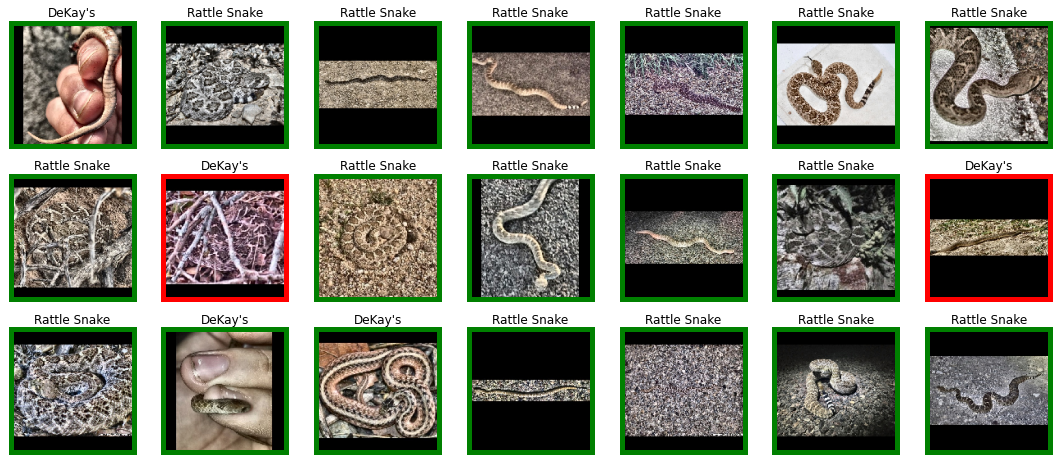

In [119]:
#Code by Hitesh Kumar https://www.kaggle.com/hitzz97/emotion-detection

fig = plt.figure(2, (15, 15))

k = 0
for j in range(21):
    px = x[j] # Snake's image of snake j; y is the snakes' class
    k += 1
    ax = plt.subplot(7, 7, k)
    ax.imshow(px, cmap ='gray',)
    ax.set_xticks([])
    ax.set_yticks([])
    
    if y[j] == np.rint(preds)[j][0]:#correct prediction will have green border
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(5)
            ax.spines[axis].set_color('green') # Set a green image border
        ax.set_title(snake_dict[int(np.rint(preds)[j][0])])

    else: # Incorrect prediction will have red border
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(5)
            ax.spines[axis].set_color('red') # Set a red image border 
        ax.set_title(snake_dict[int(np.rint(preds)[j][0])])
    plt.tight_layout()
    plt.savefig('snake_id.jpg')


Predicts **19/21** of the new images correctly. Correctly predicted images are with **green** borders and **incorrect** in red. Thats good enough for now! 

Future plan would be to include:
- more images for each class
- and more classes of snakes (i.e. new species) to expand the use of identification